# 01 Random agent baseline

#### 👉Before you try to solve a Reinforcement Learning problem you should get a grasp of its difficulty.

#### 👉 To do so, you need to design a dummy agent that can peform the task without much brains, and evaluate its performance.

#### 👉A simple way to do so is by using a Random Agent, that chooses its next action randomly, without paying attention at the current state of the environment.

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [2]:
import gym
env = gym.make('CartPole-v1')

## Random agent 🤖

In [3]:
# If this import fails, run this in your shell and relaunch jupyter:
# `export PYTHONPATH=".."`
from src.random_agent import RandomAgent
agent = RandomAgent(env)

## Evaluate the agent ⏱️

In [4]:
from src.loops import evaluate
n_episodes = 1000
rewards, steps = evaluate(agent, env, n_episodes)

100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2901.01it/s]


In [5]:
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 22.28, std 11.67


## Let's see how far we got in each attempt

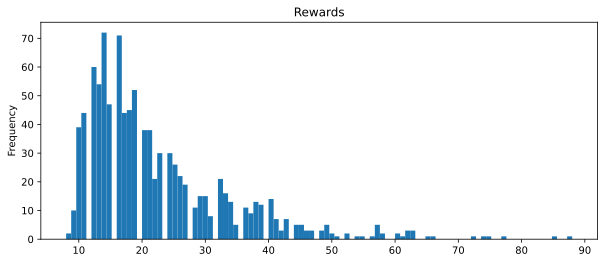

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

In [13]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=0)